In [1]:
using Healpix
using Plots
using PyCall
using PyPlot
using Falcons
pyplot()
hp = pyimport("healpy")
np = pyimport("numpy")
plt = pyimport("matplotlib.pyplot")
include("/media/heavybird/IOdata_HDD/Ishino_Lab/M2/takase/program/focalplane-config/fp_config02.jl")

Duplicate key in file PosixPath('/home/heavybird/anaconda3/envs/env_healpy/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 369 ('axes.titlesize:     24   # font size of the axes title')
Duplicate key in file PosixPath('/home/heavybird/anaconda3/envs/env_healpy/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 376 ('axes.labelsize:     24  # font size of the x and y labels')
Duplicate key in file PosixPath('/home/heavybird/anaconda3/envs/env_healpy/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 481 ('xtick.labelsize:     24  # font size of the tick labels')
Duplicate key in file PosixPath('/home/heavybird/anaconda3/envs/env_healpy/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 516 ('grid.color:     gray  # grid color')


FP4scan (generic function with 1 method)

In [2]:
lft_path = "/media/heavybird/IOdata_HDD/Ishino_Lab/M2/takase/program/focalplane-config/LFTFP4Falcons210625.csv"
mft_path = "/media/heavybird/IOdata_HDD/Ishino_Lab/M2/takase/program/focalplane-config/MFTFP4Falcons210625.csv"
hft_path = "/media/heavybird/IOdata_HDD/Ishino_Lab/M2/takase/program/focalplane-config/HFTFP4Falcons210625.csv"
lft_config = lft_focalplane_configration(lft_path)
mft_config = mft_focalplane_configration(mft_path)
hft_config = hft_focalplane_configration(hft_path);

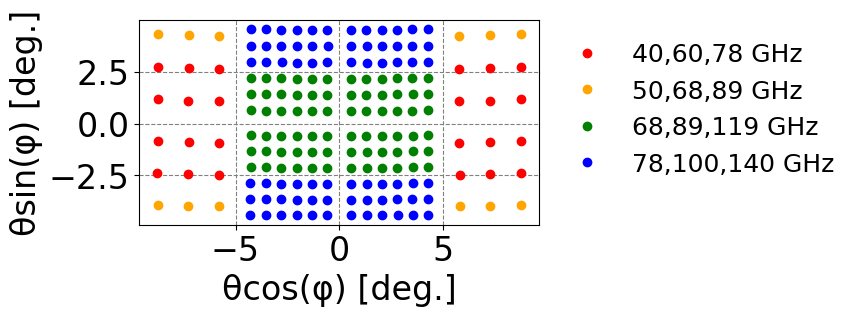

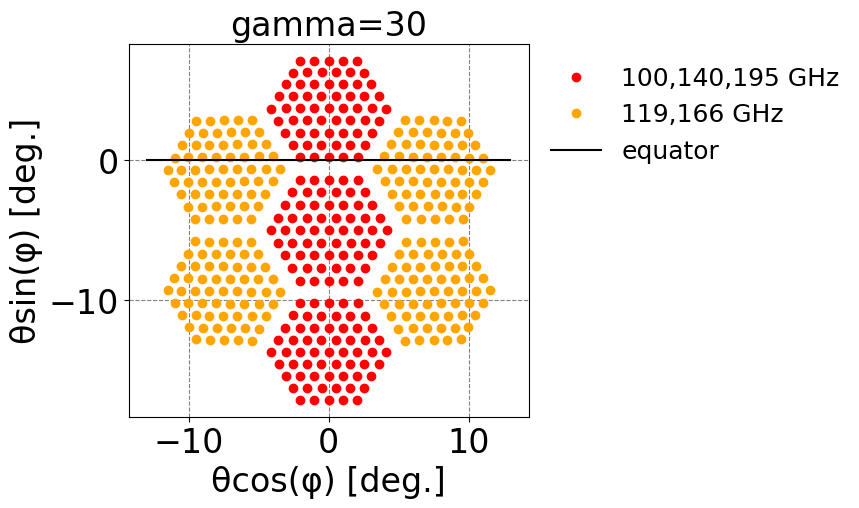

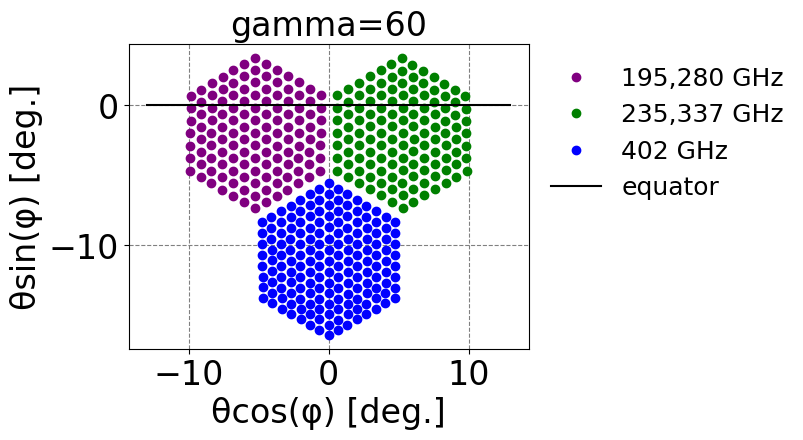

In [3]:
plt.figure(figsize=(5,5))
plot_LFT_FocalPlane(lft_config)

plt.figure(figsize=(5,5))
plot_MFT_FocalPlane(mft_config, gamma=30)

plt.figure(figsize=(5,5))
plot_HFT_FocalPlane(hft_config, gamma=60);

In [29]:
1/ss_lft.prec_rpm

192.348

In [50]:
mft_config = FP4scan("MFT", mft_config)
hft_config = FP4scan("HFT", hft_config);

ss_lft = gen_ScanningStrategy()
ss_mft = gen_ScanningStrategy()
ss_hft = gen_ScanningStrategy()
prec = 192 * 60

ss_lft.duration = prec
ss_lft.FP_theta = lft_config[:,3]
ss_lft.FP_phi = lft_config[:,4].+90
ss_lft.start_point = "pole"

gamma_mft = 30
ss_mft.duration = prec
ss_mft.FP_theta = mft_config[:,3]
ss_mft.FP_phi = mft_config[:,4] .+ gamma_mft

gamma_hft = 60
ss_hft.duration = prec
ss_hft.FP_theta = hft_config[:,3]
ss_hft.FP_phi = hft_config[:,4] .+ gamma_hft;

In [52]:
outmap = ThreeTelescopes_ScanningStrategy2map(ss_lft, ss_mft, ss_hft, 1);

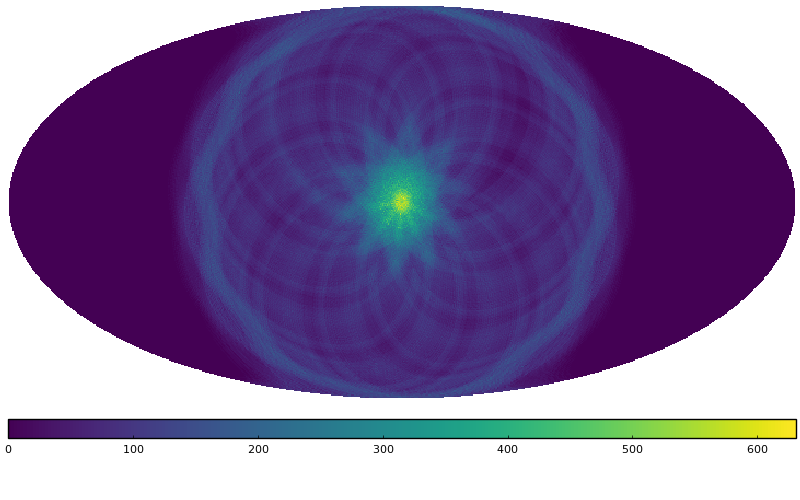

In [53]:
hitmap = HealpixMap{Float64, RingOrder}(ss_lft.nside)
hitmap.pixels = outmap[1];
Plots.plot(hitmap, c=:viridis, size=(800,500))

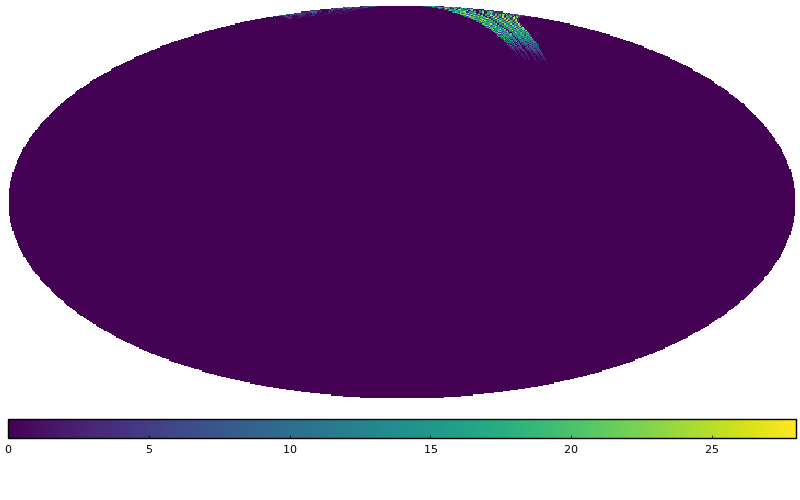

In [54]:
pointing = get_pointing_pixels(ss_lft, 0, 100)
hitmap = HealpixMap{Float64, RingOrder}(ss_lft.nside)
hitmap.pixels = pixtod2hitmap(ss_lft.nside, pointing[1])
Plots.plot(hitmap, c=:viridis, size=(800,500))

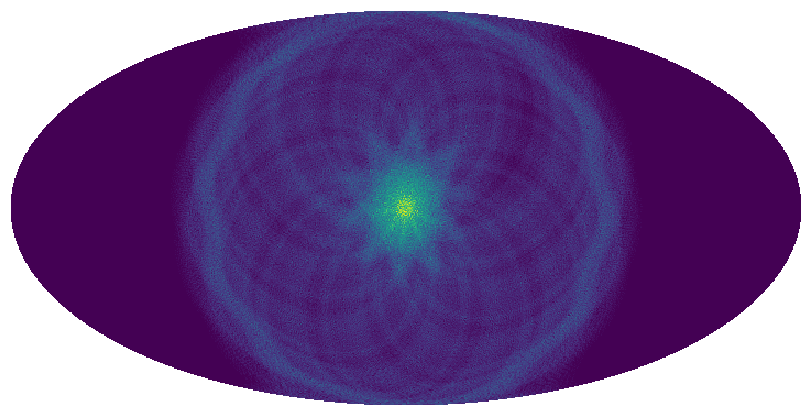

698.272299 seconds (949.23 M allocations: 49.354 GiB, 1.74% gc time)


Animation("/tmp/jl_qKQdMb", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "001143.png", "001144.png", "001145.png", "001146.png", "001147.png", "001148.png", "001149.png", "001150.png", "001151.png", "001152.png"])

In [56]:
hitmap = HealpixMap{Float64, RingOrder}(ss_lft.nside)
step = 10

duration = prec
@time anim = @animate for t in 1:step:duration
    point_lft = get_pointing_pixels(ss_lft, t-1, t)
    point_mft = get_pointing_pixels(ss_mft, t-1, t)
    point_hft = get_pointing_pixels(ss_hft, t-1, t)
    
    hitmap.pixels .+= pixtod2hitmap(ss_lft.nside, point_lft[1])
    hitmap.pixels .+= pixtod2hitmap(ss_mft.nside, point_mft[1])
    hitmap.pixels .+= pixtod2hitmap(ss_hft.nside, point_hft[1])
    
    Plots.plot(hitmap, c=:viridis, size=(800,500), colorbar=false)
end

┌ Info: Saved animation to 
│   fn = /media/heavybird/IOdata_HDD/Ishino_Lab/M2/takase/program/Falcons.jl/tutorial/scan_anime.gif
└ @ Plots /home/heavybird/.julia/packages/Plots/FCM0H/src/animation.jl:114


Plots.AnimatedGif("/media/heavybird/IOdata_HDD/Ishino_Lab/M2/takase/program/Falcons.jl/tutorial/scan_anime.gif")
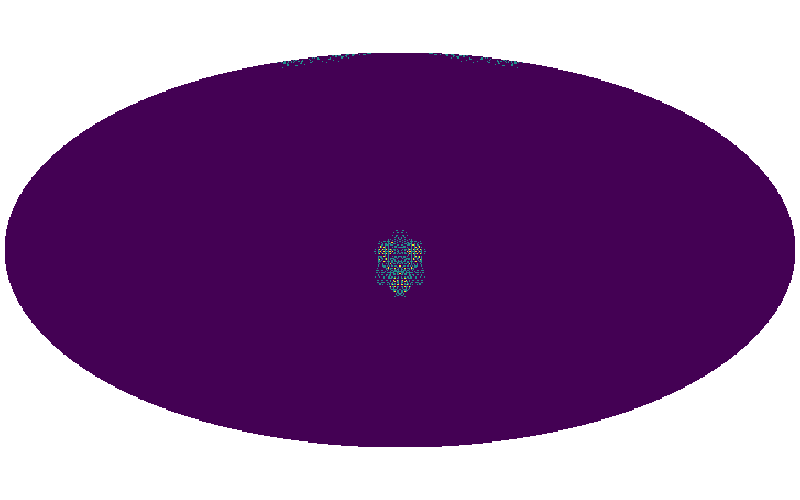

In [57]:
gif(anim, "scan_anime.gif", fps=1000)